## Basic EDA of 'merged.csv' file

#### 1) Load File and packages

Includes changing a few display options and loading in the header name from our GitHub site

In [1]:
# package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display options
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x) # supresses scientific notation

In [2]:
# load in data-frame, rename columns

path = 'merged.csv' ## change to wherever your file is loaded; I'm working on my local machine for now in a local directory

col_string = 'ID, PropertyFullStreetAddress, PropertyAddressUnitNumber, PropertyCity, County, PropertyZip, PropertyAddressLatitude, PropertyAddressLongitude, BuildingAreaSqFt, LotSizeSquareFeet, TotalRooms, FireplaceNumber, YearBuilt, EffectiveYearBuilt, YearRemodeled, NoOfStories, TotalBedrooms, NormalizedBathCount, LandAssessedValue, ImprovementAssessedValue, TotalAssessedValue, GarageNoOfCars, NormalizedListPrice,  ListDate, NormalizedSalePrice,  SoldDate'
parsed_col_string = [i.strip() for i in col_string.split(',')]
df = pd.read_csv(path, names = parsed_col_string)

#### 2) Basic EDA

- Run .describe() and build basic histograms
- Remove extraneous fields (fields with no data, etc.)
- Test sensible relationships
    - Relationship between square footage and sale price
    - Variation in average sale price by zip code
    

In [3]:
# basic EDA

df.describe()

,ID,PropertyZip,PropertyAddressLatitude,PropertyAddressLongitude,BuildingAreaSqFt,LotSizeSquareFeet,TotalRooms,FireplaceNumber,YearBuilt,EffectiveYearBuilt,YearRemodeled,NoOfStories,TotalBedrooms,NormalizedBathCount,LandAssessedValue,ImprovementAssessedValue,TotalAssessedValue,GarageNoOfCars,NormalizedListPrice,NormalizedSalePrice
count,37180.000,37180.000,37179.000,37179.000,37180.000,33591.000,37180.000,3257.000,37162.000,0.000,0.000,37180.000,37180.000,35679.000,37180.000,37153.000,37180.000,37180.000,37180.000,37180.000
mean,48791.064,78737.493,30.304,-97.791,2238.404,19915.361,0.000,1.024,1991.621,nan,nan,1.532,0.706,2.427,130869.796,303815.424,426876.439,1.832,473685.820,463249.150
std,28212.303,14.962,0.100,0.090,1025.733,136636.343,0.000,0.164,19.504,nan,nan,0.538,1.438,0.816,150062.945,236614.141,327398.942,0.790,424299.983,390902.592
min,5.000,78701.000,30.096,-98.056,439.000,388.000,0.000,1.000,1875.000,nan,nan,1.000,0.000,1.000,695.000,1.000,15001.000,0.000,50000.000,45000.000
25%,23943.500,78729.000,30.211,-97.849,1521.000,6351.000,0.000,1.000,1980.000,nan,nan,1.000,0.000,2.000,50000.000,177667.000,254337.750,1.000,275000.000,271154.750
50%,48389.500,78739.000,30.307,-97.781,2008.000,8342.000,0.000,1.000,1997.000,nan,nan,2.000,0.000,2.250,78216.000,249841.000,344475.000,2.000,369969.000,366000.000
75%,72436.500,78749.000,30.378,-97.729,2726.000,11670.000,0.000,1.000,2007.000,nan,nan,2.000,0.000,2.750,165000.000,363000.000,492248.250,2.000,529900.000,523000.000
max,98247.000,78759.000,30.517,-97.561,20117.000,6526412.000,0.000,3.000,2017.000,nan,nan,4.000,8.000,15.000,6486000.000,7461679.000,11500000.000,19.000,25000000.000,21794000.000


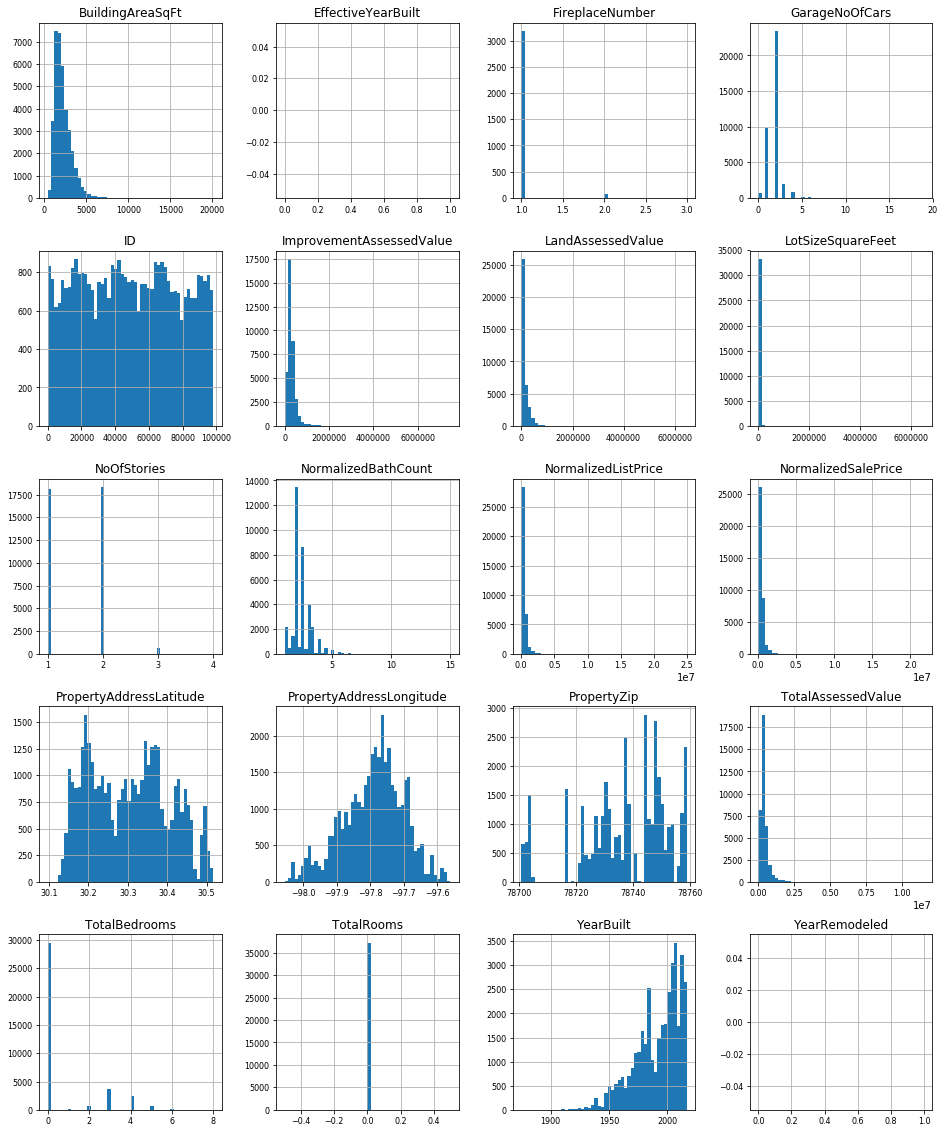

In [4]:
# basic EDA, continued

df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

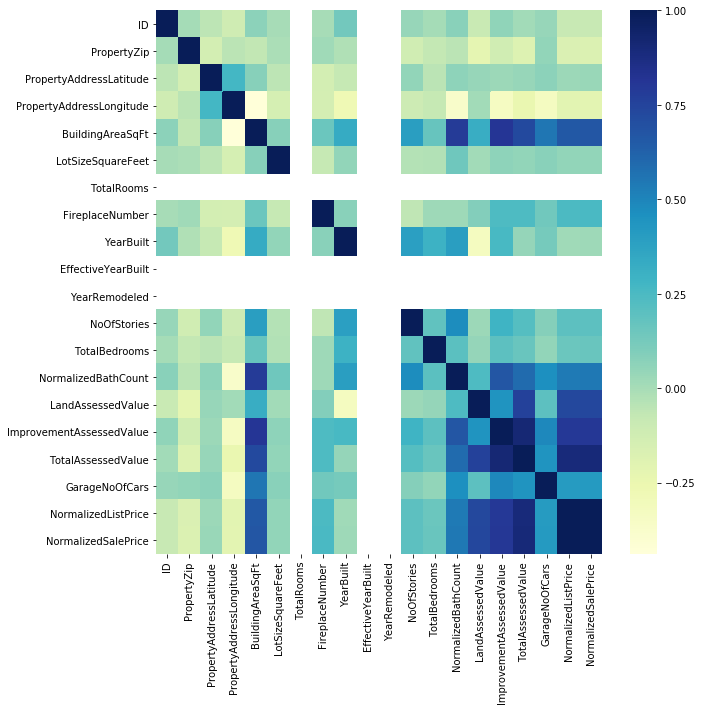

In [5]:
corr = df.corr()
plt.subplots(figsize=(10, 10))

sns.heatmap(corr,cmap="YlGnBu",annot=False)
plt.show()

In [6]:
# basic cleaning

## dropping a number of ill-populated fields, based on charts above

cols_to_drop = ['EffectiveYearBuilt', 'YearRemodeled', 'TotalRooms'] 
df.drop(columns = cols_to_drop, inplace = True)

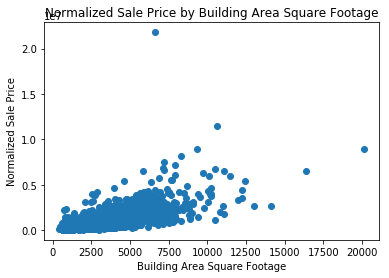

In [7]:
# Test the relationship between square footage and normalized sale price

plt.scatter(df['BuildingAreaSqFt'], df['NormalizedSalePrice'])
plt.title('Normalized Sale Price by Building Area Square Footage')
plt.xlabel('Building Area Square Footage')
plt.ylabel('Normalized Sale Price')

plt.show()

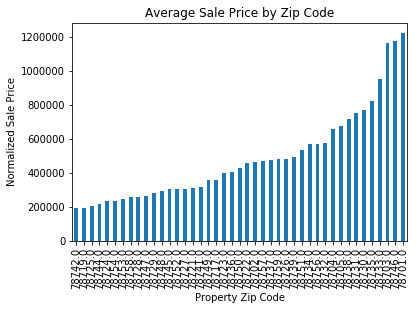

In [8]:
# See how average sale price differ by zip code. They differ a lot, but not in an unreasonable way

sales_price_by_zip = df.groupby('PropertyZip')['NormalizedSalePrice'].mean().sort_values()
sales_price_by_zip.plot(kind = 'bar')
plt.title('Average Sale Price by Zip Code')
plt.xlabel('Property Zip Code')
plt.ylabel('Normalized Sale Price')
plt.show()

# sales_price_diff_by_zip.index

Test the relationship between 'TotalAssessedValue', 'ImprovementAssessedValue', and 'LandAssessedValue', Takeaway: Usually 'Improvement' and 'Land' assessed values sum up to 'Total', but not always, and the difference can be extreme.

In [9]:
assessed_diff = df['TotalAssessedValue'] - (df['ImprovementAssessedValue'] + df['LandAssessedValue'])
assessed_diff.describe()

# df.hist(df['TotalAssessedValue'] - (df['ImprovementAssessedValue'] + df['LandAssessedValue']))
# plt.show()

count      37153.000
mean       -7593.463
std        30460.028
min     -1730827.000
25%            0.000
50%            0.000
75%            0.000
max            0.000
dtype: float64

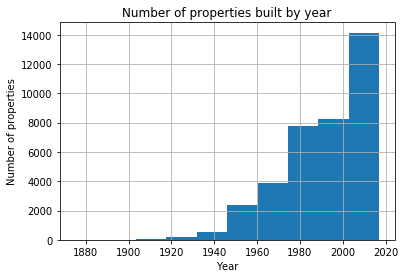

In [10]:
# investigate year built, ensure this makes sense

df['YearBuilt'].hist()
plt.title('Number of properties built by year')
plt.xlabel('Year')
plt.ylabel('Number of properties')
plt.show()

### Time Series EDA

In [11]:
# Convert date columns to YYYY-MM
df['ListYearMonth'] = pd.to_datetime(df['ListDate'], format = "%Y/%m/%d")#.dt.to_period('m')
df['SoldYearMonth'] = pd.to_datetime(df['SoldDate'], format = "%Y/%m/%d")#.dt.to_period('m')

In [12]:
df['SoldYearMonth'].head()

0   2018-07-23
1   2018-10-05
2   2018-05-18
3   2018-09-20
4   2018-08-21
Name: SoldYearMonth, dtype: datetime64[ns]

In [13]:
# Remind ourselves we have 69 months
len(df.groupby('ListYearMonth'))

1629

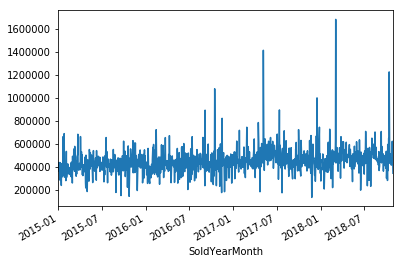

In [14]:
#Prices over time
df.groupby('SoldYearMonth').mean().NormalizedSalePrice.plot()

In [15]:
# Create new outcome? variables: Time to Sale and Sale Premium
df['DaysToSale'] = (df['SoldYearMonth'] - df['ListYearMonth']).dt.days
df['SalesPremium'] = df['NormalizedSalePrice'] - df['NormalizedListPrice']

In [16]:
# EDA of these
df[['SalesPremium', 'DaysToSale']].describe()

,SalesPremium,DaysToSale
count,37180.000,37179.000
mean,-10436.671,77.042
std,50076.649,73.029
min,-3270000.000,-29.000
25%,-12000.000,37.000
50%,-3999.000,53.000
75%,0.000,90.000
max,514935.000,1418.000


Looks like there are some issues here. 
* Sales Premium has a large range of values, best to normalize. 
* Days to sale also has a large negative minimum [outlier, should be examined/excluded]

In [17]:
print(len(df.loc[df['SalesPremium'] < -1000000]))#.max()
print(len(df.loc[df['SalesPremium'] < 0]))
print(len(df.loc[df['SalesPremium'] > 0]))

10
21853
9017


In [18]:
print(len(df.loc[df['DaysToSale'] < 0])) #few negatives, that's good
print(len(df.loc[df['DaysToSale'] == 0])) 
print(len(df.loc[df['DaysToSale'] > 365])/len(df)) #around one percent of listings take more than a year to sell

6
16
0.0107315761161915


In [19]:
df['NormalizedSalesPremium'] = df['SalesPremium'] / df['NormalizedListPrice']
df.drop('SalesPremium', axis=1, inplace=True)

In [20]:
# Look at outliers with a negative time to sale
df.loc[df['DaysToSale'] < 0]
# These look okay to exclude, or probably better, to set MonthsToSale to NaN

,ID,PropertyFullStreetAddress,PropertyAddressUnitNumber,PropertyCity,County,PropertyZip,PropertyAddressLatitude,PropertyAddressLongitude,BuildingAreaSqFt,LotSizeSquareFeet,...,TotalAssessedValue,GarageNoOfCars,NormalizedListPrice,ListDate,NormalizedSalePrice,SoldDate,ListYearMonth,SoldYearMonth,DaysToSale,NormalizedSalesPremium
1982,5019,4000 SHOAL CREEK BLVD,A,AUSTIN,TRAVIS,78757.000,30.312,-97.748,1065.000,3842.000,...,333618.000,1.000,399774.000,2018-03-31,395000.000,2018-03-30,2018-03-31,2018-03-30,-1.000,-0.012
15657,41095,1529 BRADBURY LN,NaN,AUSTIN,TRAVIS,78753.000,30.395,-97.646,2546.000,15037.000,...,246521.000,2.000,265000.000,2017-08-18,280000.000,2017-08-15,2017-08-18,2017-08-15,-3.000,0.057
25170,65825,13509 BOLIVIA DR,NaN,AUSTIN,WILLIAMSON,78729.000,30.458,-97.755,2014.000,nan,...,336575.000,1.000,285000.000,2016-05-17,315000.000,2016-05-16,2016-05-17,2016-05-16,-1.000,0.105
25931,67659,6600 W COURTYARD DR,NaN,AUSTIN,TRAVIS,78730.000,30.359,-97.802,3607.000,17698.000,...,830106.000,2.000,890000.000,2016-03-23,850000.000,2016-03-17,2016-03-23,2016-03-17,-6.000,-0.045
27129,70410,6225 ANTIGO LN,NaN,AUSTIN,TRAVIS,78739.000,30.179,-97.899,2125.000,8294.000,...,433000.000,2.000,433000.000,2016-07-01,433000.000,2016-06-30,2016-07-01,2016-06-30,-1.000,0.000
36152,95446,10312 THISTLE MOSS CV,NaN,AUSTIN,TRAVIS,78739.000,30.190,-97.872,2043.000,11461.000,...,359154.000,2.000,354000.000,2015-06-06,354000.000,2015-05-08,2015-06-06,2015-05-08,-29.000,0.000


In [21]:
df['DaysToSale'].replace(df['DaysToSale'].loc[df['DaysToSale'] < 0], np.NaN, inplace=True)
#df.loc[df['MonthsToSale'] < 0]

In [22]:
df[['NormalizedSalesPremium', 'DaysToSale']].describe()

,NormalizedSalesPremium,DaysToSale
count,37180.000,37173.000
mean,-0.013,77.055
std,0.039,73.027
min,-0.556,0.000
25%,-0.029,37.000
50%,-0.010,53.000
75%,0.000,90.000
max,0.748,1418.000


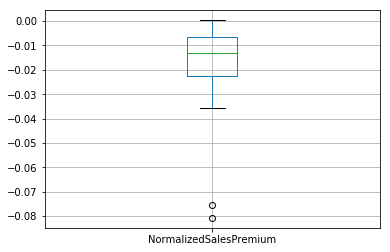

In [23]:
df.groupby('PropertyZip')[['NormalizedSalesPremium']].mean().boxplot()#.plot() need to 1-hot encode for this

Most our sales are between 1% above and 3.5% below list price. Outliers exist around 7.5 and 8%

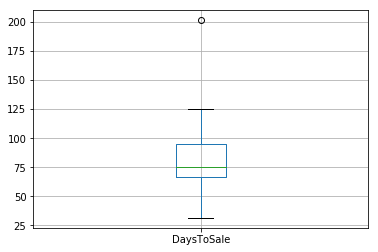

In [24]:
df.groupby('PropertyZip')[['DaysToSale']].mean().boxplot()

Most of our sales take 1 to 4 months. Outliers take more than 6 months

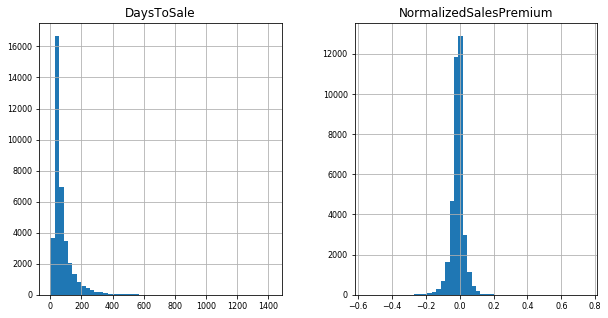

In [25]:
df[['NormalizedSalesPremium', 'DaysToSale']].hist(figsize=(10, 5), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

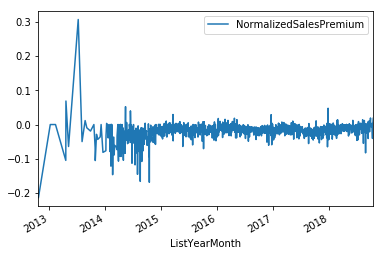

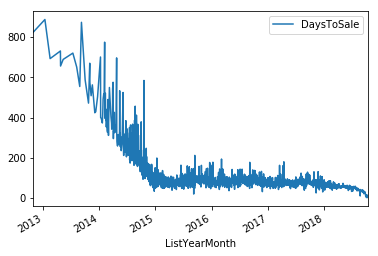

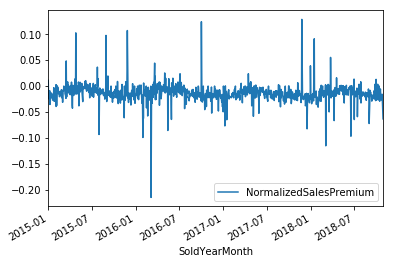

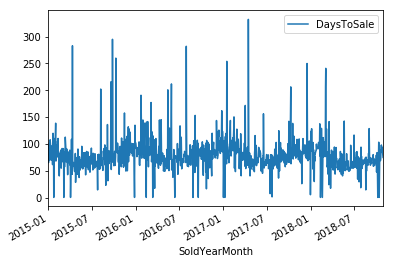

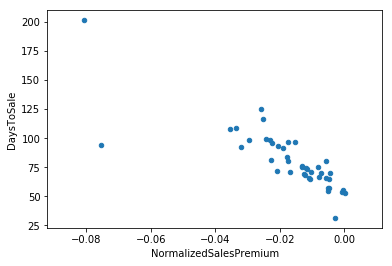

In [26]:
df.groupby('ListYearMonth')['NormalizedSalesPremium', 'ListYearMonth'].mean().plot()
df.groupby('ListYearMonth')['DaysToSale', 'ListYearMonth'].mean().plot()
df.groupby('SoldYearMonth')['NormalizedSalesPremium', 'SoldYearMonth'].mean().plot()
df.groupby('SoldYearMonth')['DaysToSale', 'SoldYearMonth'].mean().plot()

df.groupby('PropertyZip').mean().plot.scatter('NormalizedSalesPremium', 'DaysToSale')
#plt.show()

#### Key insights

1.  Sold dates not reported until 2015 account for pre-2015 funkiness in the first 2 graphs
* Austin gets 'hotter' in 2015-present both based on time to sales and sales premium, on average
* Average sales premium is negative, always. 
** Also the trend is towards a larger discount
* Some clear seasonality at play here
* Negative correlation between the time to sale and the sales premium. This is interesting but a catch22 problem.

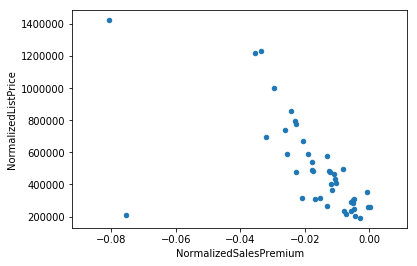

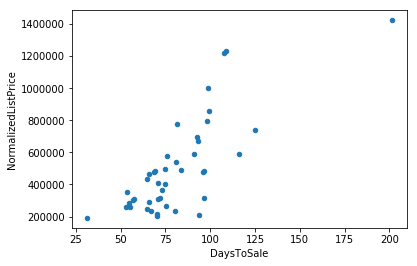

In [29]:
# Sales vs. List Price by zip code
df.groupby('PropertyZip').mean().plot.scatter('NormalizedSalesPremium', 'NormalizedListPrice')
df.groupby('PropertyZip').mean().plot.scatter('DaysToSale', 'NormalizedListPrice')

#### Key insights
1. expensive zipcodes get knocked down in price the most, but sometimes cheap zipcodes are mispriced (this is the main reason why prices get changed, market conditions are #2)
* expensive zipcodes don't sell for more than list price, only cheap zipcodes (sometimes) do
* expensive zipcodes take longer to sell

## More EDA...

In [30]:
# Percentage built on. Useful for identifying types of construction, zoning laws, low density developments, etc..
df['built_prct'] = df['BuildingAreaSqFt']/df['LotSizeSquareFeet']
df['built_prct'].describe()

count   33591.000
mean        0.257
std         0.165
min         0.000
25%         0.165
50%         0.232
75%         0.320
max         4.793
Name: built_prct, dtype: float64

In [31]:
# 0 would mean an empty lot
print(len(df.loc[df['built_prct'] == 0]))
# 1 would usually mean an apartment/condo
print(len(df.loc[df['built_prct'] == 1]))
# >1 could mean multiple levels of construction
print(len((df.loc[(df['built_prct'] > 1)])))
print(len((df.loc[(df['built_prct'] > 1) & (df['NoOfStories'] > 1)])))
# print what look like outliers
df.loc[(df['built_prct'] > 1) & (df['NoOfStories'] == 1)]

0
0
157
154


,ID,PropertyFullStreetAddress,PropertyAddressUnitNumber,PropertyCity,County,PropertyZip,PropertyAddressLatitude,PropertyAddressLongitude,BuildingAreaSqFt,LotSizeSquareFeet,...,GarageNoOfCars,NormalizedListPrice,ListDate,NormalizedSalePrice,SoldDate,ListYearMonth,SoldYearMonth,DaysToSale,NormalizedSalesPremium,built_prct
4251,11593,410 E 5TH ST,501A,AUSTIN,TRAVIS,78701.000,30.266,-97.739,2362.000,1773.000,...,1.000,1600000.000,2018-03-05,1500000.000,2018-08-01,2018-03-05,2018-08-01,149.000,-0.062,1.332
21894,57554,5063 FORT CLARK DR,NaN,AUSTIN,TRAVIS,78745.000,30.204,-97.763,1234.000,1150.000,...,1.000,209500.000,2016-11-10,210000.000,2016-12-22,2016-11-10,2016-12-22,42.000,0.002,1.073
32254,85029,4804 MISTY SLOPE LN,NaN,AUSTIN,TRAVIS,78744.000,30.177,-97.753,1352.000,1281.000,...,2.000,134900.000,2015-10-30,132000.000,2015-12-18,2015-10-30,2015-12-18,49.000,-0.021,1.055


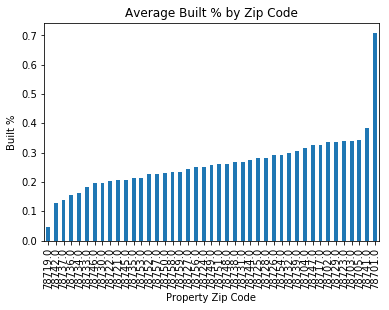

In [32]:
built_prct_by_zip = df.groupby('PropertyZip')['built_prct'].mean().sort_values()
built_prct_by_zip.plot(kind = 'bar')
plt.title('Average Built % by Zip Code')
plt.xlabel('Property Zip Code')
plt.ylabel('Built %')
plt.show()

### Creating new CSV with the additional 2 outcomes vars, and built_percent feature

In [33]:
target = 'NormalizedSalePrice'
rlvnt_numeric_cols = ['BuildingAreaSqFt', 'LotSizeSquareFeet', 'built_prct', 'FireplaceNumber', 'NoOfStories', 'TotalBedrooms', 
                'NormalizedBathCount', 'LandAssessedValue', 'ImprovementAssessedValue', 'TotalAssessedValue', 
                'GarageNoOfCars', 'NormalizedListPrice', 'MonthsToSale', 'NormalizedSalesPremium', 'built_prct']
categorical_cols = ['County', 'PropertyZip', 'YearBuilt', 'ListYearMonth', 'SoldYearMonth']

In [34]:
df.to_csv('merged2.csv', header=None, sep=',')

In [35]:
df.columns

Index(['ID', 'PropertyFullStreetAddress', 'PropertyAddressUnitNumber',
       'PropertyCity', 'County', 'PropertyZip', 'PropertyAddressLatitude',
       'PropertyAddressLongitude', 'BuildingAreaSqFt', 'LotSizeSquareFeet',
       'FireplaceNumber', 'YearBuilt', 'NoOfStories', 'TotalBedrooms',
       'NormalizedBathCount', 'LandAssessedValue', 'ImprovementAssessedValue',
       'TotalAssessedValue', 'GarageNoOfCars', 'NormalizedListPrice',
       'ListDate', 'NormalizedSalePrice', 'SoldDate', 'ListYearMonth',
       'SoldYearMonth', 'DaysToSale', 'NormalizedSalesPremium', 'built_prct'],
      dtype='object')

In [36]:
df.head()

,ID,PropertyFullStreetAddress,PropertyAddressUnitNumber,PropertyCity,County,PropertyZip,PropertyAddressLatitude,PropertyAddressLongitude,BuildingAreaSqFt,LotSizeSquareFeet,...,GarageNoOfCars,NormalizedListPrice,ListDate,NormalizedSalePrice,SoldDate,ListYearMonth,SoldYearMonth,DaysToSale,NormalizedSalesPremium,built_prct
0,5,3507 GREYSTONE DR,NaN,AUSTIN,TRAVIS,78731.000,30.358,-97.749,696.000,1481.000,...,0.000,160000.000,2018-06-15,155000.000,2018-07-23,2018-06-15,2018-07-23,38.000,-0.031,0.470
1,43,6425 WESTSIDE DR,NaN,AUSTIN,TRAVIS,78731.000,30.345,-97.754,1440.000,3271.000,...,2.000,309999.000,2018-05-05,230000.000,2018-10-05,2018-05-05,2018-10-05,153.000,-0.258,0.440
2,58,8405 ARDASH LN,NaN,AUSTIN,TRAVIS,78759.000,30.378,-97.758,2031.000,3903.000,...,2.000,280000.000,2018-01-25,250000.000,2018-05-18,2018-01-25,2018-05-18,113.000,-0.107,0.520
3,71,6632 E HILL DR,NaN,AUSTIN,TRAVIS,78731.000,30.348,-97.753,1760.000,1651.000,...,1.000,325000.000,2018-06-20,278000.000,2018-09-20,2018-06-20,2018-09-20,92.000,-0.145,1.066
4,74,8820 HONEYSUCKLE TRL,NaN,AUSTIN,TRAVIS,78759.000,30.380,-97.743,1664.000,3890.000,...,0.000,295000.000,2018-08-16,280000.000,2018-08-21,2018-08-16,2018-08-21,5.000,-0.051,0.428


In [37]:
#numeric_zip_code_df = df.groupby('PropertyZip').mean()[rlvnt_numeric_cols]
#pd.plotting.scatter_matrix(numeric_zip_code_df, figsize=[18.0,18.0])
#numeric_zip_code_df.head()

### Zipcode heatmap visualizations

I decided to make a few of these to look at some variables that might indicate changes over time in neighborhoods...

In [52]:
df3 = df[['PropertyZip', 'built_prct', 'ListYearMonth']]

In [54]:
df['ListYearMonth'] = df['ListYearMonth'].dt.to_period('m')

In [55]:
df3 = df3.set_index(['ListYearMonth', 'PropertyZip']).groupby(['PropertyZip', 'ListYearMonth']).mean()
df3 = df3.unstack(level=1)#.fillna(0)

In [56]:
df3.head()

built_prct                                                  \
ListYearMonth    2012-10 2013-01 2013-02 2013-04 2013-05 2013-07 2013-08   
PropertyZip                                                                
78701.000            nan     nan     nan     nan     nan     nan     nan   
78702.000            nan     nan     nan     nan     nan     nan     nan   
78703.000            nan   0.263     nan     nan     nan     nan     nan   
78704.000            nan     nan     nan   0.344     nan     nan   0.668   
78705.000            nan     nan     nan     nan     nan     nan     nan   

                                       ...                                  \
ListYearMonth 2013-09 2013-10 2013-11  ... 2018-01 2018-02 2018-03 2018-04   
PropertyZip                            ...                                   
78701.000         nan     nan     nan  ...     nan   0.460   1.332     nan   
78702.000         nan     nan     nan  ...   0.535   0.282   0.275   0.238   
78703.000         nan   0.507     nan  ...   0.340   0.303   0.383   0.341   
78704.000         nan   0.332     nan  ...   0.327   0.286   0.295   0.323   
78705.000         nan     nan     nan  ...     nan     nan   0.297   0.436   

                                                               
ListYearMonth 2018-05 2018-06 2018-07 2018-08 2018-09 2018-10  
PropertyZip                                                    
78701.000         nan     nan     nan     nan     nan     nan  
78702.000       0.249   0.333   0.224   0.361   0.331     nan  
78703.000       0.307   0.316   0.429   0.311   0.358     nan  
78704.000       0.281   0.350   0.313   0.283   0.290   0.263  
78705.000       0.199   0.264     nan     nan     nan     nan  

[5 rows x 69 columns]

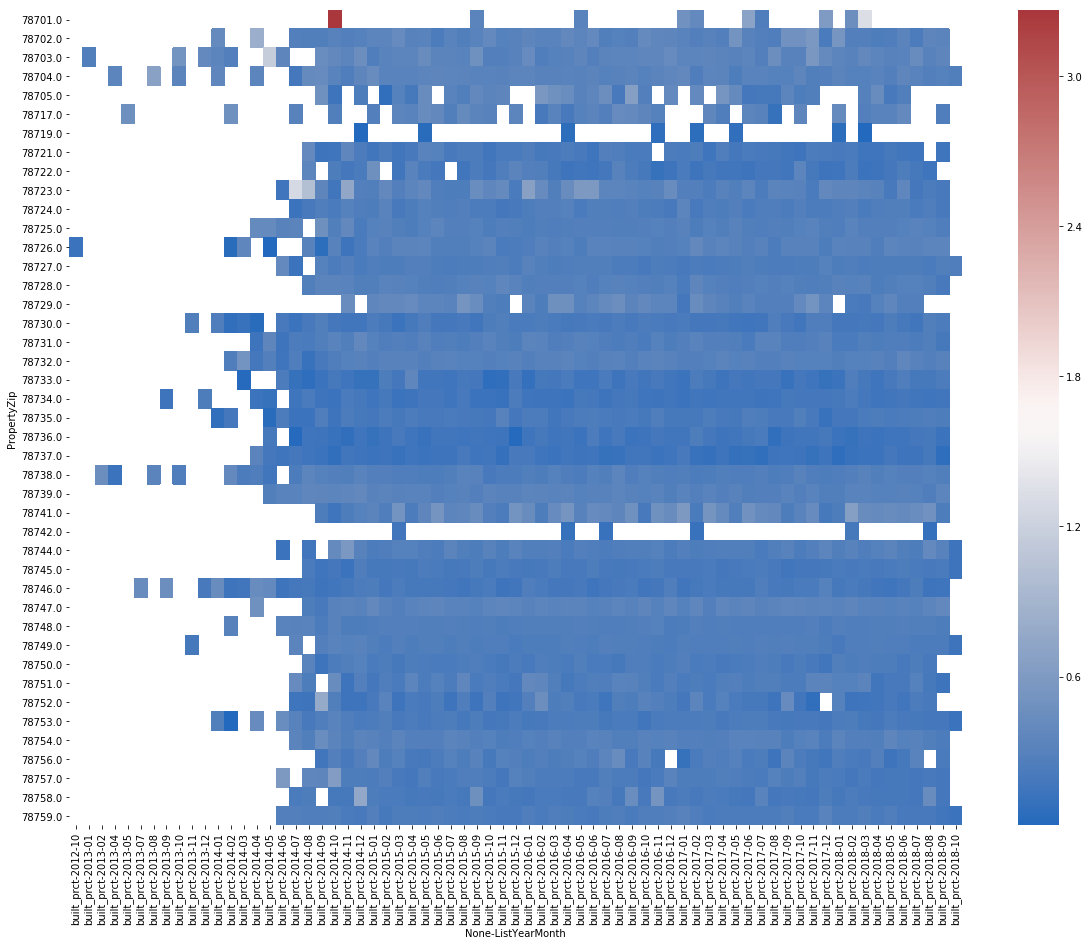

In [57]:
plt.subplots(figsize=(20,15))
sns.heatmap(df3, cmap="vlag")

### List prices over time by zip

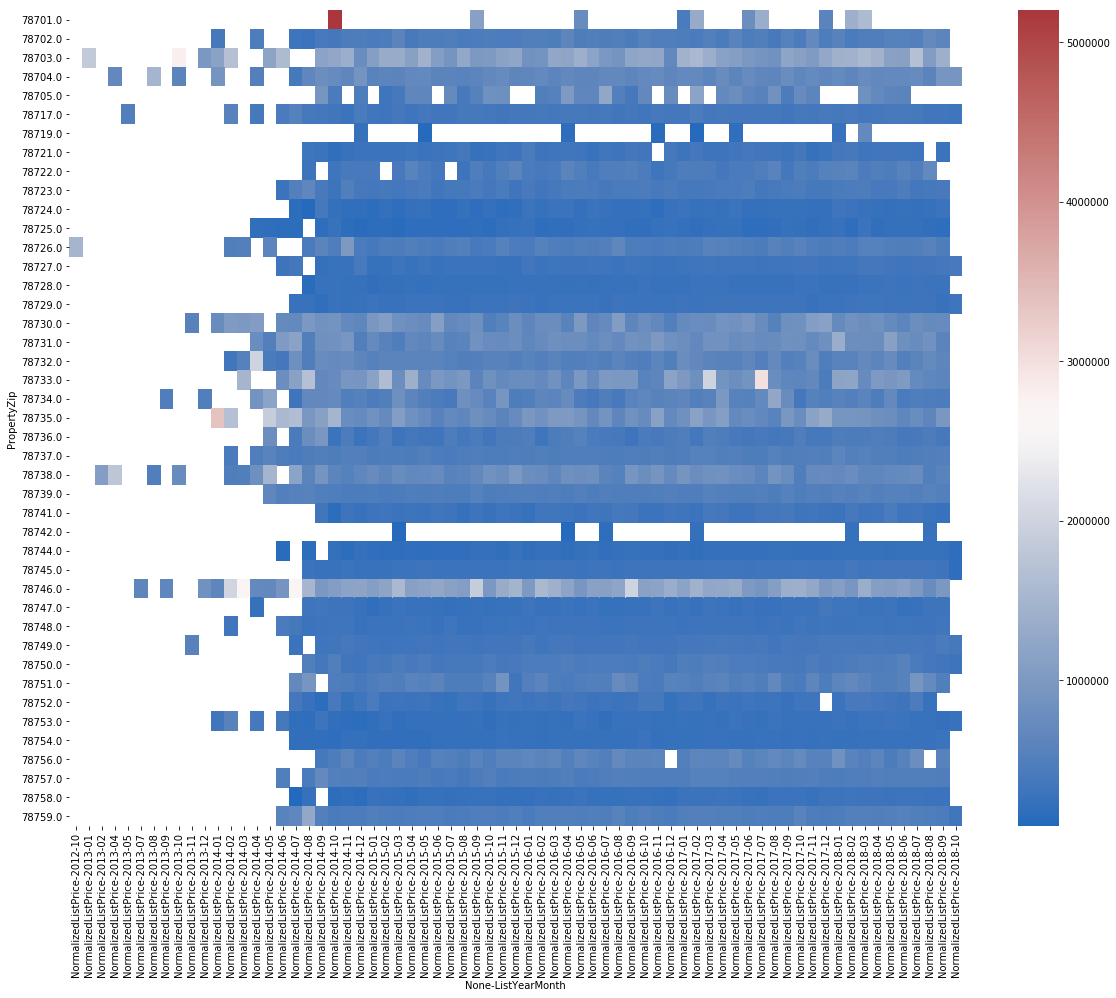

In [43]:
df4 = df[['PropertyZip', 'NormalizedListPrice', 'ListYearMonth']]
df4 = df4.set_index(['ListYearMonth', 'PropertyZip']).groupby(['PropertyZip', 'ListYearMonth']).mean()
df4 = df4.unstack(level=1)#.fillna(0)
plt.subplots(figsize=(20,15))
sns.heatmap(df4, cmap="vlag")

### Days to sale by zip over time

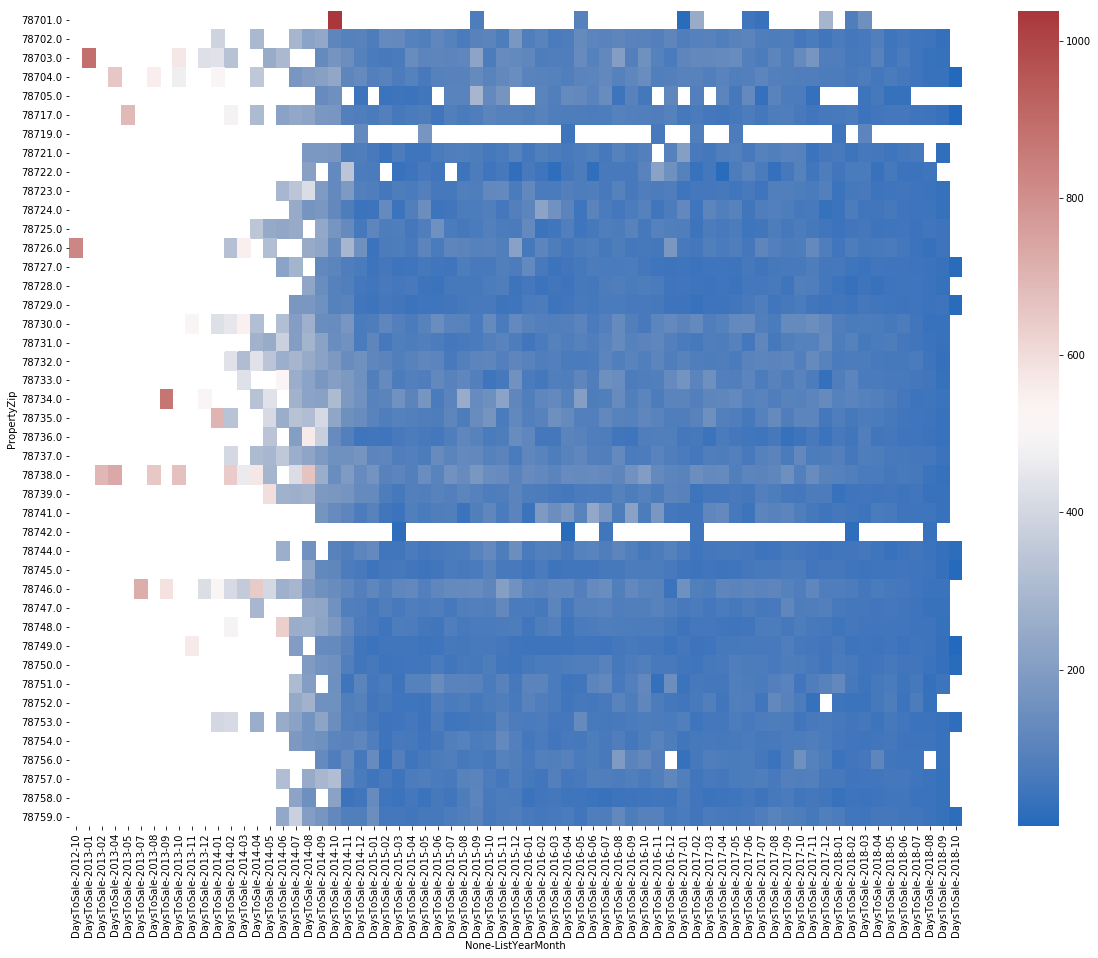

In [44]:
df5 = df[['PropertyZip', 'DaysToSale', 'ListYearMonth']]
df5 = df5.set_index(['ListYearMonth', 'PropertyZip']).groupby(['PropertyZip', 'ListYearMonth']).mean()
df5 = df5.unstack(level=1)#.fillna(100)
plt.subplots(figsize=(20,15))
sns.heatmap(df5, cmap="vlag")

Maybe a few that pop out at me are 78701, 78741, 78756